Training iteration = 0
Training iteration = 200
Training iteration = 400
Training iteration = 600
Training iteration = 800
Training iteration = 1000
Training iteration = 1200
Training iteration = 1400
Training iteration = 1600
Training iteration = 1800
Training iteration = 2000
Training iteration = 2200
Training iteration = 2400
Training iteration = 2600
Training iteration = 2800
Training iteration = 3000
Training iteration = 3200
Training iteration = 3400
Training iteration = 3600
Training iteration = 3800
Training iteration = 4000
Training iteration = 4200
Training iteration = 4400
Training iteration = 4600
Training iteration = 4800
Training iteration = 5000
Training iteration = 5200
Training iteration = 5400
Training iteration = 5600
Training iteration = 5800
Training iteration = 6000
Training iteration = 6200
Training iteration = 6400
Training iteration = 6600
Training iteration = 6800
Training iteration = 7000
Training iteration = 7200
Training iteration = 7400
Training iteration 

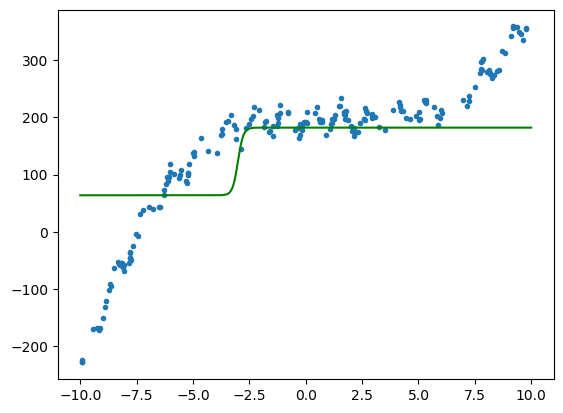

In [1]:
include("example_nnet.jl")

# 3.2

In [2]:
using Printf

# Load X and y variable
using JLD
using PyPlot
data = load("basisData.jld")
(X,y) = (data["X"],data["y"])
n = size(X,1)
X = [ones(n,1) X]
d = 2

max_X = maximum(X)*1.5
max_y = maximum(y)*1.5

println(max_X, "\t", max_y)

X = X/max_X
y = y/max_y;

14.671247752337992	538.4099373024457


In [3]:
function train()
    i = rand(1:n)
    (f,g) = NeuralNet_backprop(w,X[i,:],y[i],nHidden)
    g_total = g
	for i in rand(1:n, batch_size - 1)
        (f,g) = NeuralNet_backprop(w,X[i,:],y[i],nHidden)
        g_total += g
    end
    global prev_g = 0.2 * g_total/batch_size^0.5 + 0.8 *prev_g
    
    global w = w - stepSize*(prev_g) - stepSize*L2*w
end

train (generic function with 1 method)

In [4]:
function test()
    figure()
    clf()
    Xhat = -1/1.5:.01:1/1.5
    input = [ones(length(Xhat),1)/max_X Xhat]
    yhat = NeuralNet_predict(w,input,nHidden)
    plot(X[:,2]*max_X,y*max_y,".")
    plot(Xhat*max_X,yhat*max_y,"g-")
#     sleep(.1)
end

test (generic function with 1 method)

# Attempt 1

In [15]:
# Choose network structure and randomly initialize weights
include("NeuralNet.jl")
nHidden = [32,32,32,32,32]
nParams = NeuralNet_nParams(d,nHidden)
w = randn(nParams,1)*0.7
prev_g = w * 0

# Train with stochastic gradient
batch_size = 100;


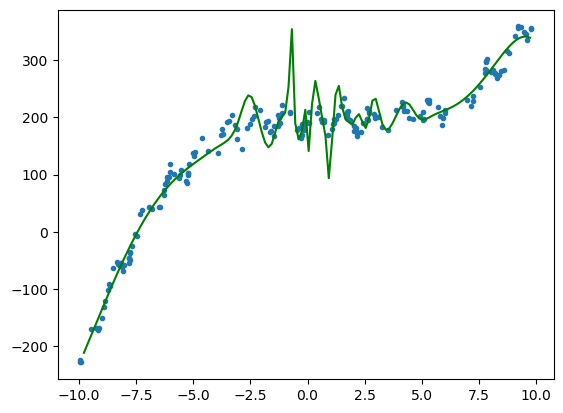

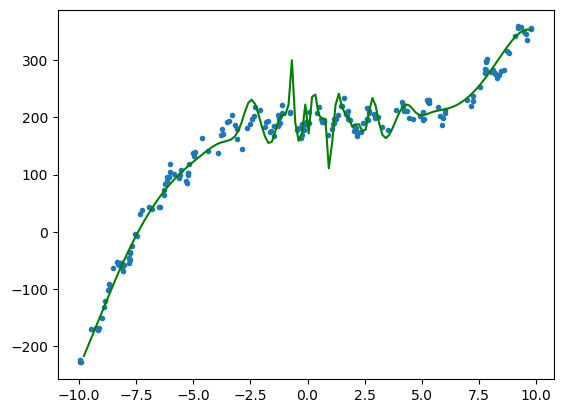

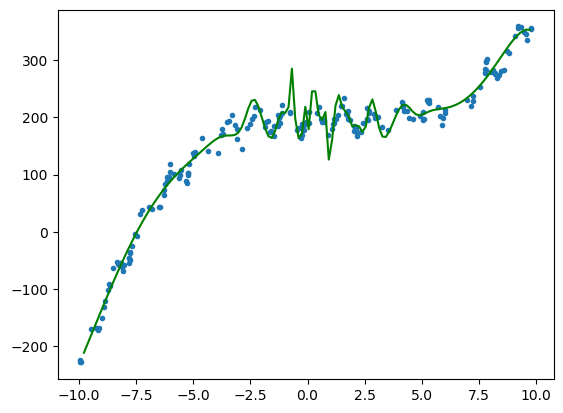

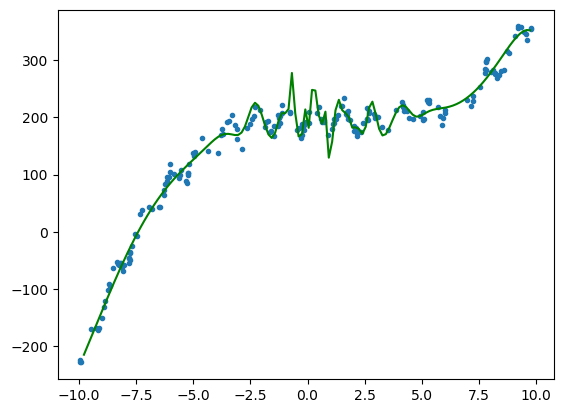

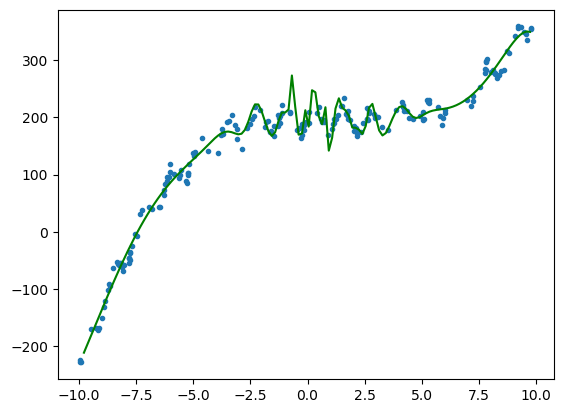

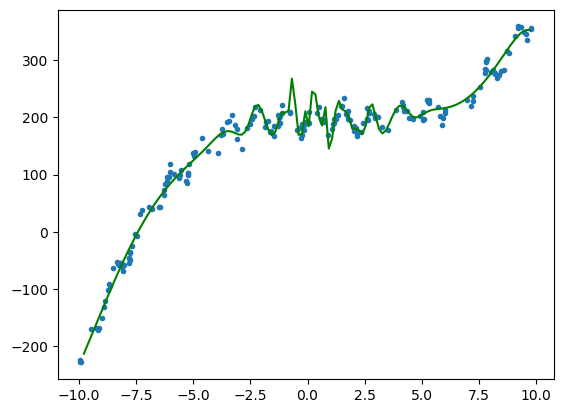

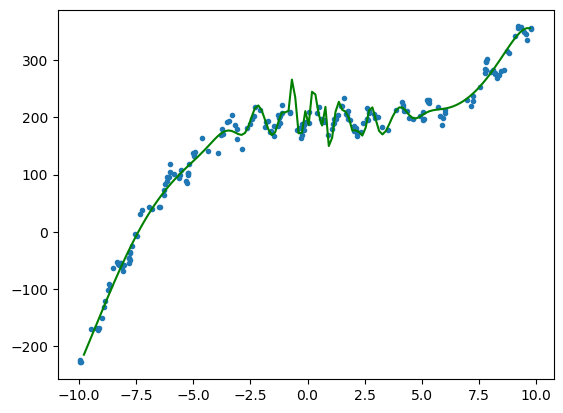

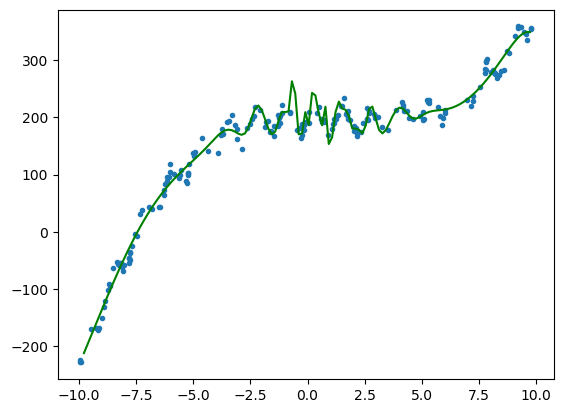

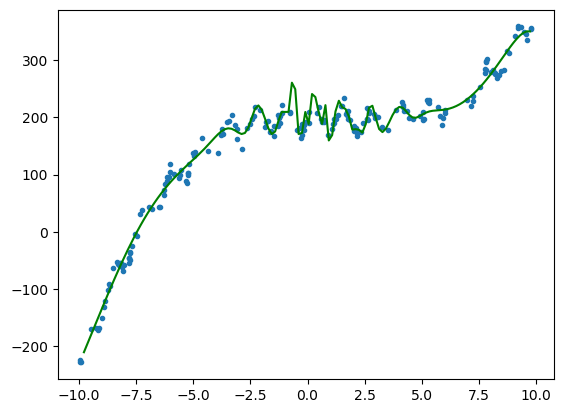

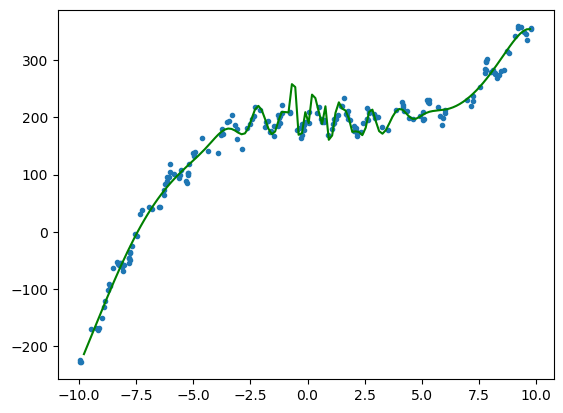

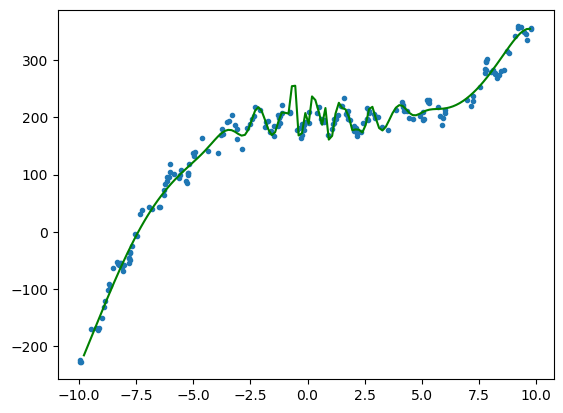

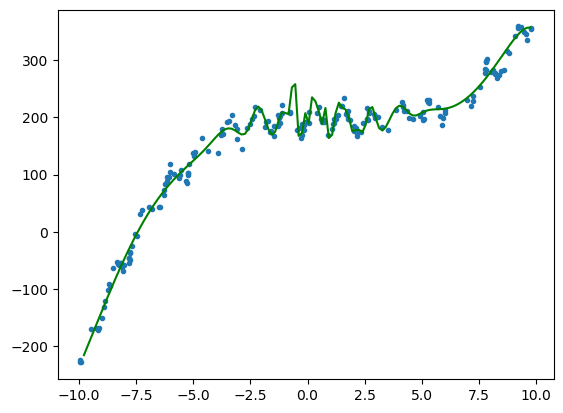

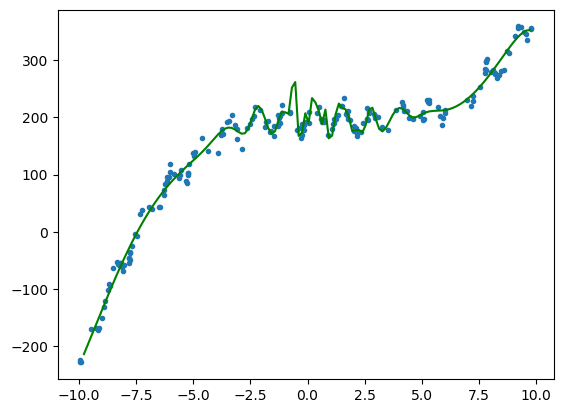

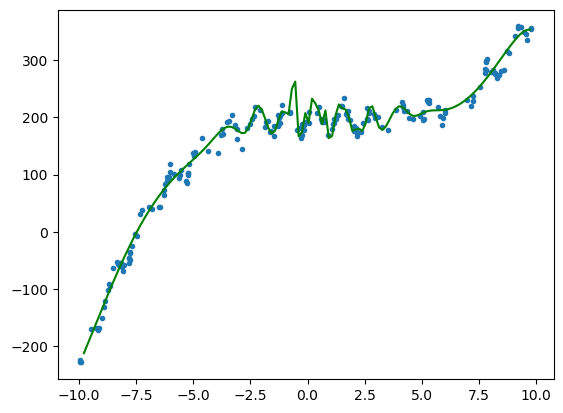

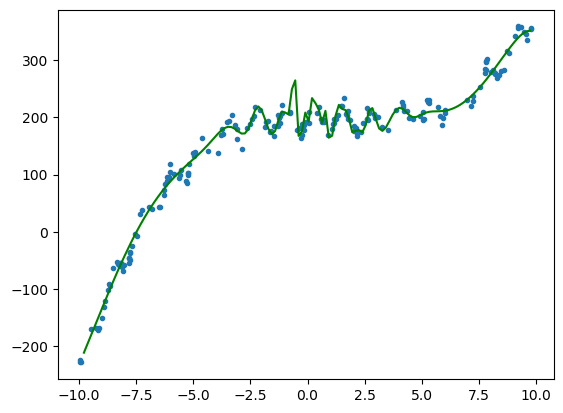

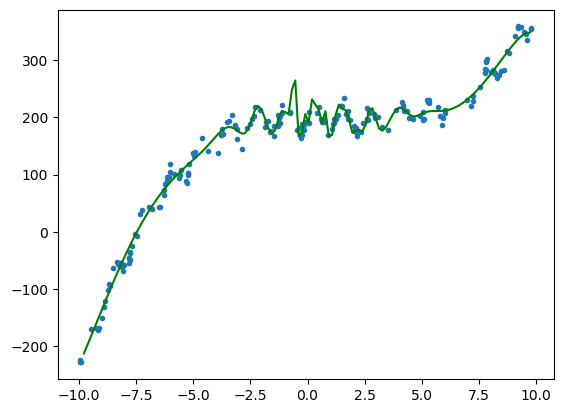

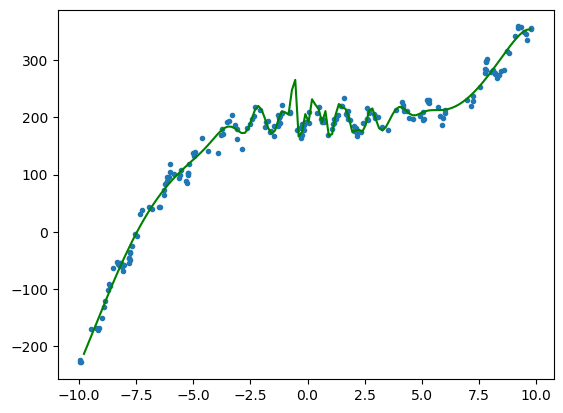

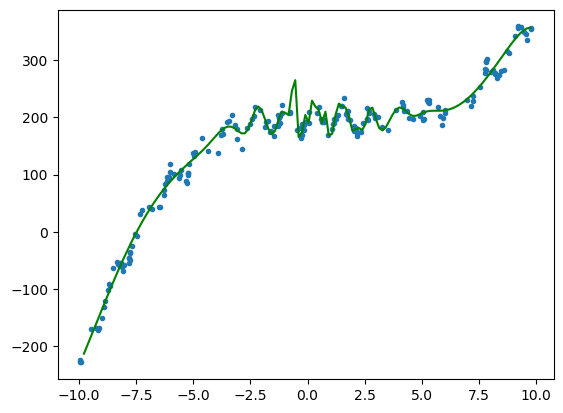

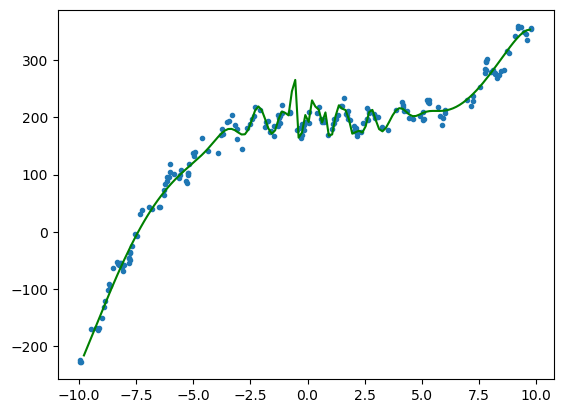

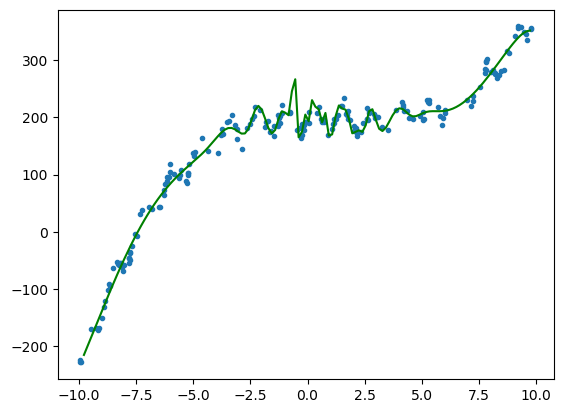

In [16]:
stepSize = 1e-3
L2 = 1e-4
for t in 1:10000
    train()
    if t%500 == 0
        test()
    end
end

# Attempt 2

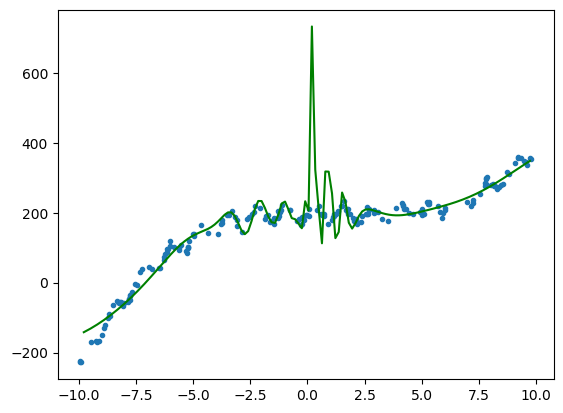

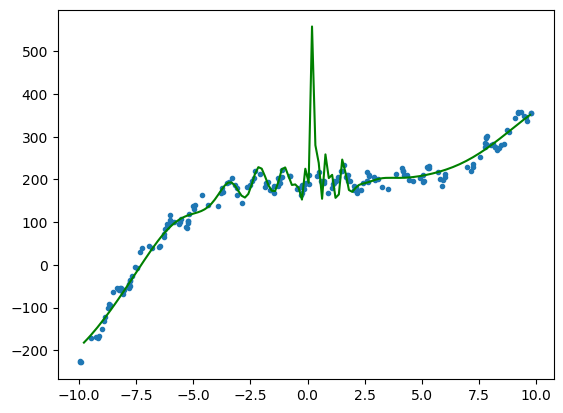

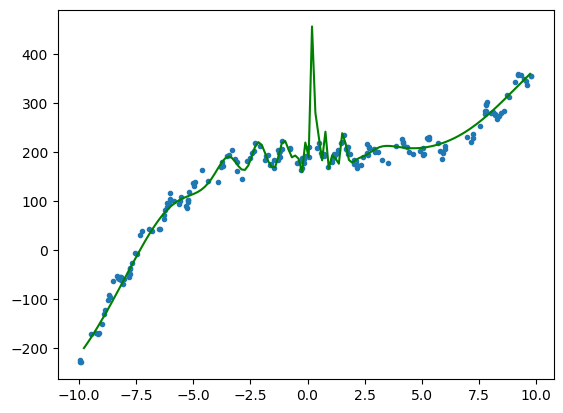

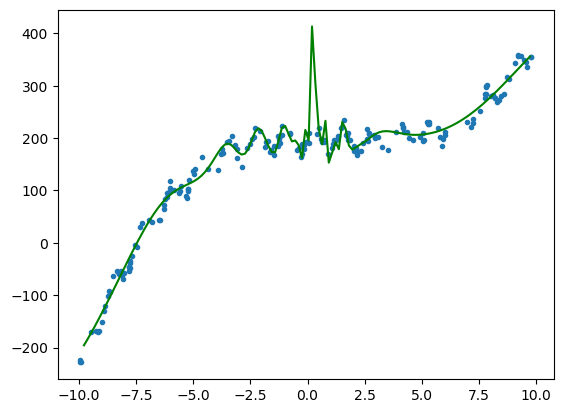

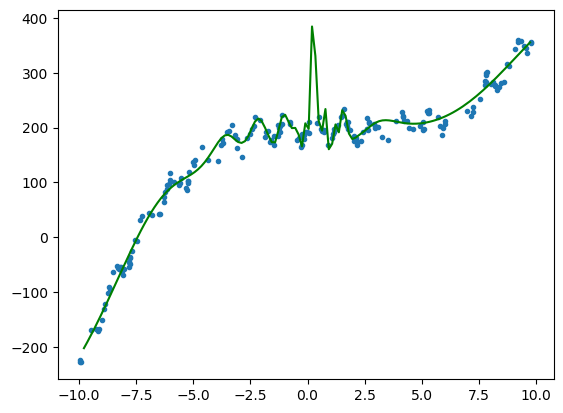

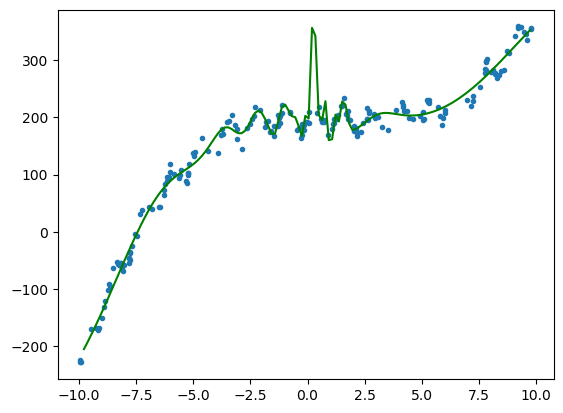

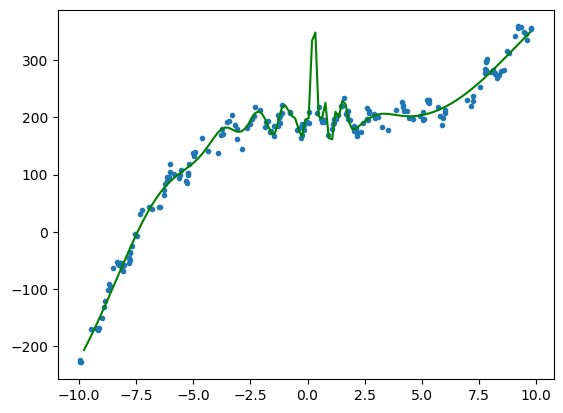

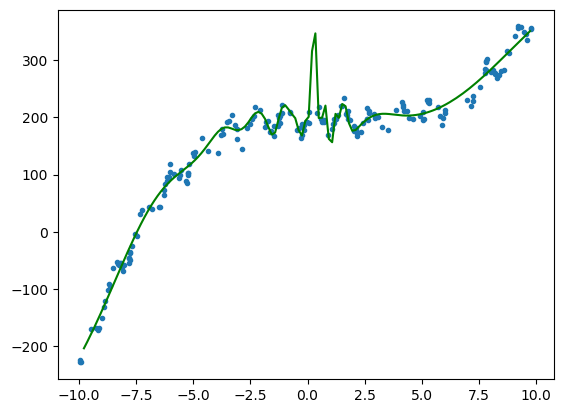

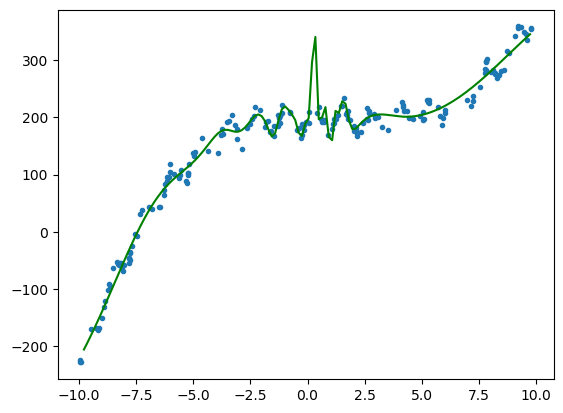

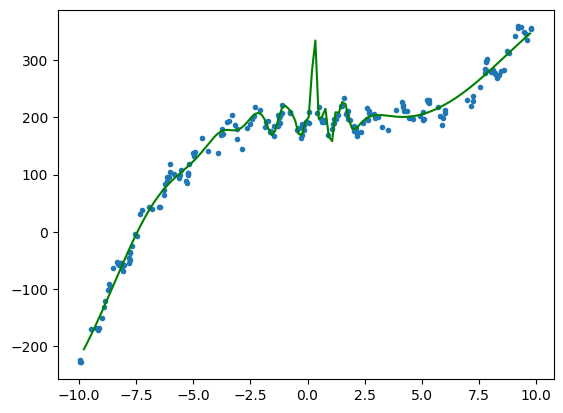

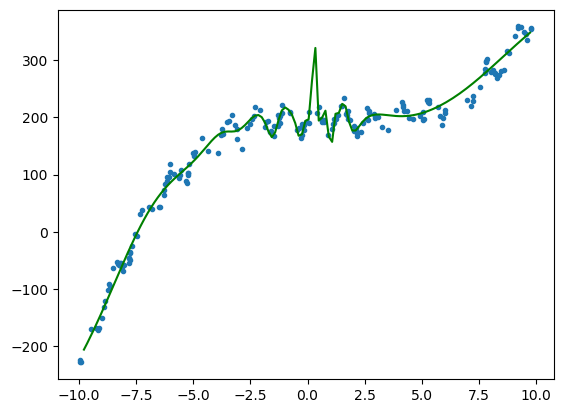

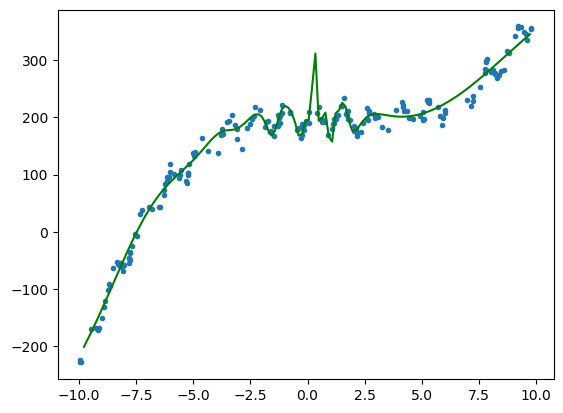

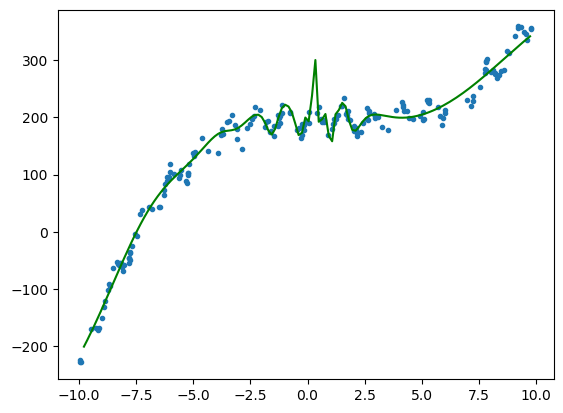

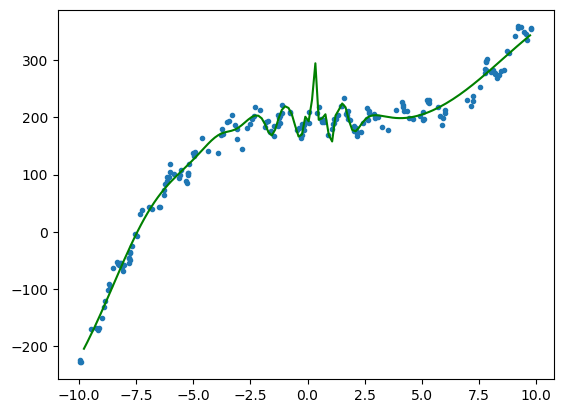

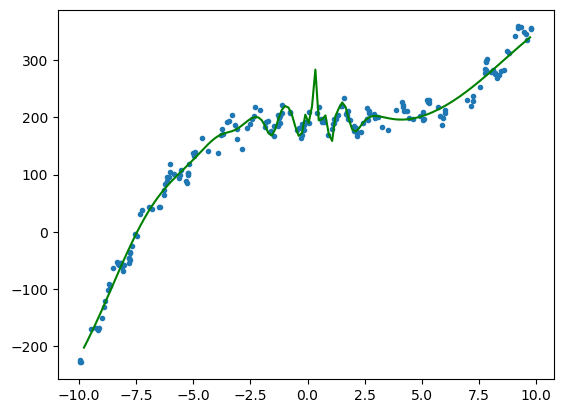

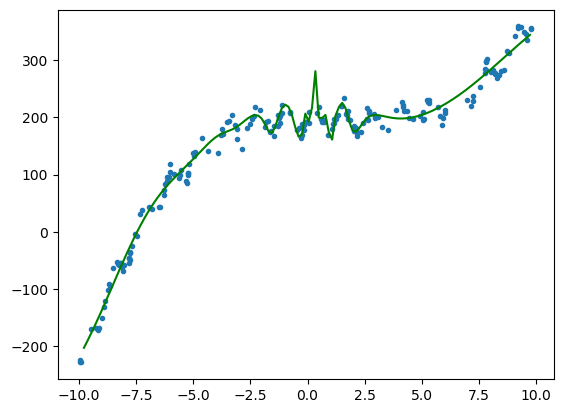

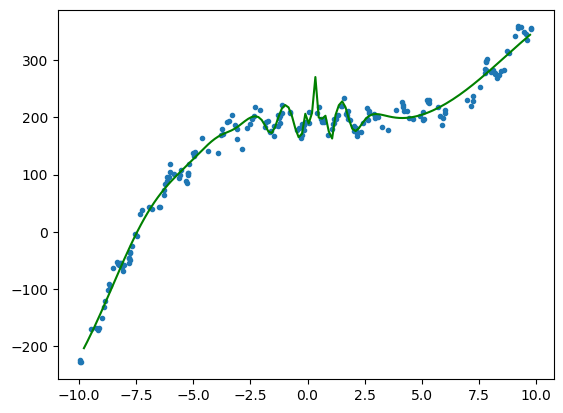

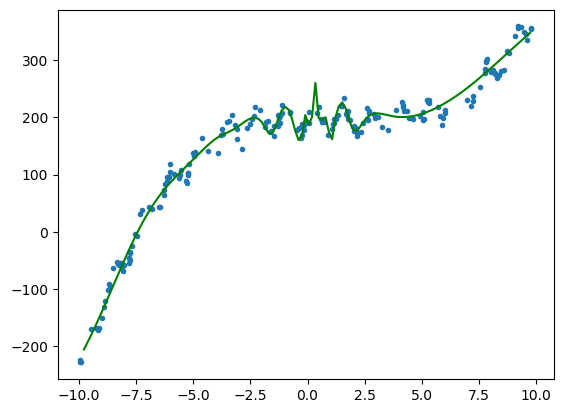

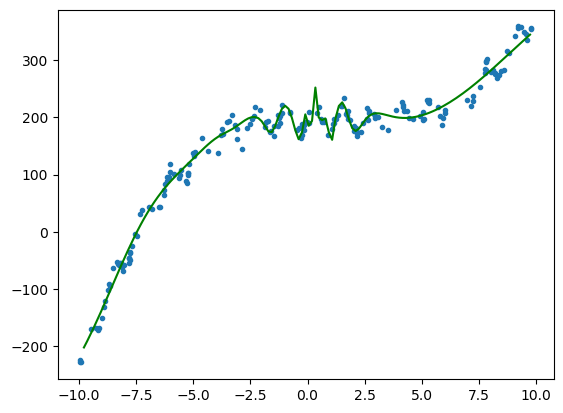

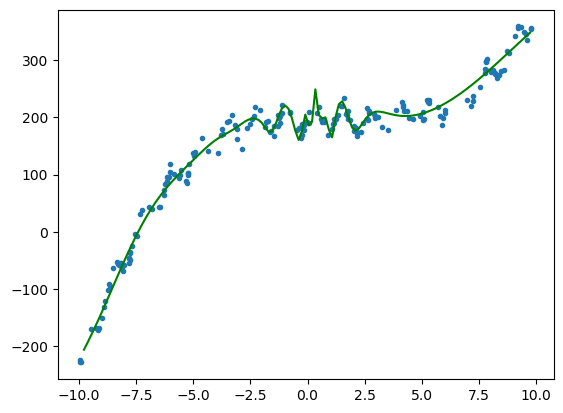

In [58]:
# Choose network structure and randomly initialize weights
include("NeuralNet.jl")
nHidden = [32,32,32,32,32,32]
nParams = NeuralNet_nParams(d,nHidden)
w = randn(nParams,1)*0.65
prev_g = w * 0

# Train with stochastic gradient
batch_size = 100;


stepSize = 1e-3
L2 = 2e-2
for t in 1:10000
    train()
    if t%500 == 0
        test()
    end
end